In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-sentiment-analysis-hatred-speech/train.csv
/kaggle/input/twitter-sentiment-analysis-hatred-speech/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/twitter-sentiment-analysis-hatred-speech/train.csv")
test = pd.read_csv("/kaggle/input/twitter-sentiment-analysis-hatred-speech/test.csv")

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [5]:
train.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [7]:
train.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [8]:
test.isnull().sum()

id       0
tweet    0
dtype: int64

In [9]:
import seaborn as sn

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

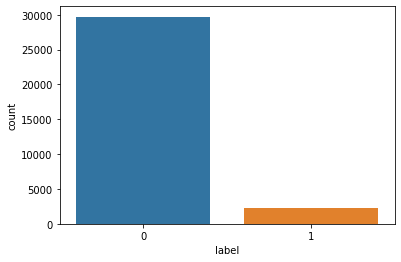

In [10]:
sn.countplot(train.label)

In [11]:
x = train.tweet
y = train.label

In [12]:
x.shape

(31962,)

In [13]:
y.shape

(31962,)

In [14]:
from tensorflow.keras.preprocessing.text import one_hot

In [15]:
voc_size = 10000

In [16]:
onehot_repre = [one_hot(words, voc_size) for words in x]
onehot_repre[0]

[6379,
 9785,
 4126,
 7203,
 1838,
 926,
 5011,
 1838,
 8647,
 7020,
 3750,
 6478,
 9722,
 668,
 1119,
 9722,
 636,
 5462]

In [17]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
import numpy as np

In [18]:
sent_len = 50
embedded_docs = pad_sequences(onehot_repre, padding='pre', maxlen=sent_len)
print(embedded_docs)

[[   0    0    0 ... 9722  636 5462]
 [   0    0    0 ... 7150 7622 5109]
 [   0    0    0 ... 9482 8243 2367]
 ...
 [   0    0    0 ...  579 1838 6733]
 [   0    0    0 ... 9117 8528 2593]
 [   0    0    0 ... 8537 6577 4900]]


In [19]:
y = np.asarray(y).astype('float32').reshape((-1,1))

In [20]:
embedded_docs

array([[   0,    0,    0, ..., 9722,  636, 5462],
       [   0,    0,    0, ..., 7150, 7622, 5109],
       [   0,    0,    0, ..., 9482, 8243, 2367],
       ...,
       [   0,    0,    0, ...,  579, 1838, 6733],
       [   0,    0,    0, ..., 9117, 8528, 2593],
       [   0,    0,    0, ..., 8537, 6577, 4900]], dtype=int32)

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [22]:
embedding_vector_features = 40
model = keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(layers.Embedding(voc_size, embedding_vector_features, input_length=sent_len))

# Add a LSTM layer with 128 internal units.
model.add(layers.LSTM(100))

# Add a Dense layer with 10 units.
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 40)            400000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 456,501
Trainable params: 456,501
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(
    loss='binary_crossentropy',
    optimizer="adam",
    metrics=["accuracy"],
)


model.fit(
    embedded_docs, y, batch_size=64, epochs=10
)

Epoch 1/10
500/500 [==============================] - 40s 76ms/step - loss: 0.2646 - accuracy: 0.9305
Epoch 2/10
500/500 [==============================] - 38s 76ms/step - loss: 0.0913 - accuracy: 0.9686
Epoch 3/10
500/500 [==============================] - 38s 76ms/step - loss: 0.0559 - accuracy: 0.9813
Epoch 4/10
500/500 [==============================] - 38s 76ms/step - loss: 0.0376 - accuracy: 0.9882
Epoch 5/10
500/500 [==============================] - 38s 76ms/step - loss: 0.0284 - accuracy: 0.9918
Epoch 6/10
500/500 [==============================] - 38s 76ms/step - loss: 0.0177 - accuracy: 0.9954
Epoch 7/10
500/500 [==============================] - 38s 76ms/step - loss: 0.0123 - accuracy: 0.9967
Epoch 8/10
500/500 [==============================] - 38s 76ms/step - loss: 0.0071 - accuracy: 0.9984
Epoch 9/10
500/500 [==============================] - 39s 77ms/step - loss: 0.0052 - accuracy: 0.9986
Epoch 10/10
500/500 [==============================] - 38s 77ms/step - loss: 0.003

In [24]:
test_y = test.tweet

In [25]:
onehot_repr = [one_hot(words, voc_size) for words in test_y]
onehot_repr[0]

[1425, 2150, 1072, 8360, 9054, 2826, 7916, 1035, 8318]

In [26]:
sent_len = 50
embedded_doc = pad_sequences(onehot_repr, padding='pre', maxlen=sent_len)
print(embedded_doc)

[[   0    0    0 ... 7916 1035 8318]
 [   0    0    0 ... 5011 1156 5848]
 [   0    0    0 ... 9551 7214 4978]
 ...
 [   0    0    0 ... 7198 2245 2331]
 [   0    0    0 ... 4315  579 4786]
 [   0    0    0 ... 7569 6661 1212]]


In [27]:
len(embedded_doc)

17197

In [28]:
y_pred = model.predict(embedded_doc)
y_pred

array([[1.4443500e-06],
       [7.3614717e-04],
       [1.5456133e-06],
       ...,
       [1.3104615e-05],
       [3.7350162e-07],
       [1.7702496e-07]], dtype=float32)

In [29]:

for item in y_pred:
    if item <= 0.5:
        print(1)
    else:
        print(0)


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
0
1
